In [2]:
import os
import sys

In [8]:
import numpy as np

In [49]:
import scipy
from scipy import ndimage as ndi
import napari

In [58]:
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [5]:
import ccdb
import tifffile as tiff
import astromorpho as astro

Can't load imreg package, affine and homography registrations won't work


/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/imfun/external/tifffile.py:7261: UserWarning: No module named 'imfun.external._tifffile'
  Functionality might be degraded or be slow.

  warnings.warn("%s%s" % (e, warn))
/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/imfun/external/czifile.py:146: UserWarning: ImportError: No module named '_czifile'. Decoding of JXR and JPEG encoded images will not be available. Czifile.pyx can be obtained at http://www.lfd.uci.edu/~gohlke/
  warnings.warn(
2022-09-13 12:40:20.562320: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/levtg/astro-morpho/venv/lib/python3.10/site-packages/cv2/../../lib64:/home/levtg/v3d_external/v3d_main/common_lib/lib/
2022-09-13 12:40:20.562344: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dler

In [69]:
from skimage import exposure

In [6]:
import graph_utils as gu  
import visualization as vis

In [11]:
from pathlib import Path

# Параметры для запуска


In [65]:
data_dir = '/home/levtg/astro-morpho/data/alisa/before'
filename = 'M5_UG.tiff'

use_clahe = True
sigmas = 2**np.arange(0, 3, 0.5)

VERBOSE = True

# Set false to start from console
HANDY = True

# Set true to save output
OUT = False

# Чтение данных

In [66]:
filepath = Path(data_dir).joinpath(filename)
filepath

PosixPath('/home/levtg/astro-morpho/data/alisa/before/M5_UG.tiff')

In [67]:
stack = tiff.imread(filepath)

In [68]:
if VERBOSE:
    napari.view_image(stack)

/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/napari_tools_menu/__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


In [39]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [41]:
signaltonoise(stack, axis=None)

array(37.6672632)

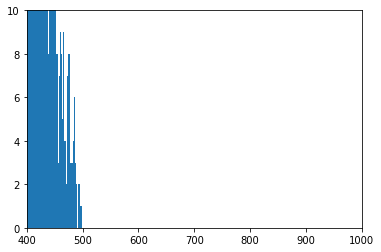

/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [99]:
plt.hist(np.ravel(stack), bins=255)
plt.xlim(400, 1000)
plt.ylim(0, 10)
plt.show()

In [93]:
test_image.max()

991

In [100]:
# test_image = np.clip(stack, a_min=0, a_max=3000)
test_image = stack[:]
test_image[test_image >= 500] = 0

w = napari.view_image(test_image)

/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/napari_tools_menu/__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/numpy/core/numeric.py:2446: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


In [102]:
w.layers[1].data

[array([[ 14.        , 346.23703306, 345.48098278],
        [ 14.        , 346.23703306, 366.98379255],
        [ 14.        , 359.46953138, 366.98379255],
        [ 14.        , 359.46953138, 345.48098278]])]

In [103]:
stack.shape

(28, 362, 512)

In [110]:
noise = stack[14, 345:359, 345:366]
noise.min(), noise.max()

(124, 152)

In [115]:
tmp = stack - noise.max() + noise.min()
tmp.max()

65508

In [111]:
napari.view_image(stack - 152+124)

/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/napari_tools_menu/__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(0.0, 180.5, 255.5), zoom=3.0244140625, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=3, ndisplay=2, last_used=0, range=((0.0, 28.0, 1.0), (0.0, 362.0, 1.0), (0.0, 512.0, 1.0)), current_step=(14, 181, 256), order=(0, 1, 2), axis_labels=('0', '1', '2')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'Image' at 0x7f473fd9ab30>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10, unit=None), text_overlay=TextOverlay(visible=False, color=(0.5, 0.5, 0.5, 1.0), font_size=10, position=<TextOverlayPosition.TOP_LEFT: 'top_left'>, text=''), overlays=Overlays(interaction_box=InteractionBox(points=None, show=False, show_handle=False, show_vertices=False, 

In [ ]:
# exposure.rescale_intensity(stack, in_range = 'image', out_range = 'dtype')

## Фильтрация изображения

In [55]:
from skimage.filters import threshold_minimum, threshold_li, threshold_yen, threshold_isodata, threshold_otsu, threshold_triangle
from skimage.morphology import remove_small_objects

In [43]:
img_noisy = stack
img_noisy.min(), img_noisy.max()

(91, 349)

In [53]:
def largest_region(mask):
    labels, nlab = ndi.label(mask)
    if nlab > 0:
        objs = ndi.find_objects(labels)
        sizes = [np.sum(labels[o]==k+1) for k,o in enumerate(objs)]
        k = np.argmax(sizes)
        return labels==k+1
    else:
        return mask

In [45]:
def filter_image(image, filter_func):
    threshold = filter_func(image)
    #img_filt = np.where(image > threshold, image, 0)
    pre_mask = ndi.binary_closing(image >= threshold)
    pre_mask = remove_small_objects(pre_mask, 5, connectivity=3)
    binary_clean = largest_region(pre_mask)
    return np.where(binary_clean, image, 0), threshold

In [56]:
img_li, li = filter_image(img_noisy, threshold_li)
img_min, m = filter_image(img_noisy, threshold_minimum)
img_iso, iso = filter_image(img_noisy, threshold_isodata)
img_yen, yen = filter_image(img_noisy, threshold_yen)
# img_loc, loc = filter_image(img_noisy, threshold_local)
img_tr, tr = filter_image(img_noisy, threshold_triangle)
img_ots, ots = filter_image(img_noisy, threshold_otsu)

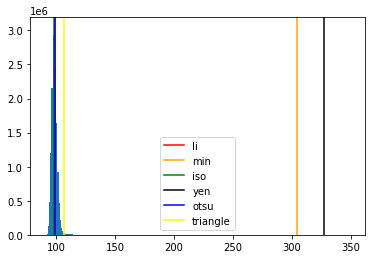

In [59]:
plt.hist(np.ravel(img_noisy), bins=255)
plt.axvline(li, color='red', label='li')
plt.axvline(m, color='orange', label='min')
plt.axvline(iso, color='green', label='iso')
plt.axvline(yen, color='black', label='yen')
plt.axvline(ots, color='blue', label='otsu')
plt.axvline(tr, color='yellow', label='triangle')
plt.legend()
# plt.hist(np.ravel(img_clear), bins=255)
plt.show()

In [60]:
w = napari.view_image(img_noisy)
w.add_image(img_li)
w.add_image(img_tr)
w.add_image(img_min)
w.add_image(img_iso)
w.add_image(img_yen)
w.add_image(img_ots)
w.add_image(img)

/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/napari_tools_menu/__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


NameError: name 'img' is not defined

In [120]:
image = w.layers[0].data
image[image <= 138] = 0

In [121]:
v = napari.view_image(image)

/home/levtg/astro-morpho/venv/lib64/python3.10/site-packages/napari_tools_menu/__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
